<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="Stock.jpg">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size= 24px>
                    <b>Stock Market Prediction
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='PS'></a>
#  Problem Statement


To predict the next day's closing price of a stock using historical stock data.

Stock prices fluctuate daily due to various factors. The goal is to build a predictive model using past stock prices to estimate the stock's 
closing price for the next day


<a id='IP'></a>
#  Installation of required packages

In [102]:
!pip install yfinance

In [104]:
import yfinance as yf

<a id='DD'></a>
#  Downloading SP500 Data

In [106]:
sp500 = yf.Ticker("^GSPC")

In [108]:
sp500 = sp500.history(period="max" )

<a id='RD'></a>
#  Read Data

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Read and display data to get an insight into the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [110]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-23 00:00:00-04:00,5711.899902,5725.359863,5704.220215,5718.569824,3529550000,0.0,0.0
2024-09-24 00:00:00-04:00,5727.660156,5735.319824,5698.990234,5732.930176,3872710000,0.0,0.0
2024-09-25 00:00:00-04:00,5733.649902,5741.029785,5712.060059,5722.259766,3624910000,0.0,0.0


#### Dimensions of the data

In [112]:
# 'shape' function gives the total number of rows and columns in the data
sp500.shape

(24302, 7)

<a id='data_preparation'></a>
#  Data Analysis and Preparation

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Data preparation is the process of cleaning and transforming raw data before building predictive models. <br><br>
                        Here, we analyze and prepare data to perform classification techniques:<br>
                        1. Check data types. Ensure your data types are correct. Refer data definitions to validate <br>
                        2. If data types are not as per business definition, change the data types as per requirement <br>
                        3. Study summary statistics<br>
                        4. Distribution of variables<br>
                        5. Study correlation<br>
                        6. Detect outliers<br>
                        7. Check for missing values<br><br>
                        Note: It is an art to explore data, and one needs more and more practice to gain expertise in this area
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Data_Understanding'></a>
## 4.1 Understand the Dataset

<a id='Data_Types'></a>
### 4.1.1 Data Type
The main data types in Pandas dataframes are the object, float, int64, bool, and datetime64. To understand each attribute of our data, it is always good for us to know the data type of each column.

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>In our dataset, we have numerical and categorical variables. The numeric variables should have data type 'int'/'float' while categorical variables should have data type 'object'.<br><br> 
                        1. Check for the data type <br>
                        2. For any incorrect data type, change the data type with the appropriate type<br>
                        3. Recheck for the data type
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Check for the data type**

In [114]:
# 'dtypes' gives the data type for each column
sp500.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>From the above output, it is clear that the data type of all the variables except 'volume' is float64. The data type of 'volume' is int64.<br><br></b>
                </font>
            </div>
        </td>
    </tr>
</table>




In [116]:
sp500.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [118]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-09-16 00:00:00-04:00', '2024-09-17 00:00:00-04:00',
               '2024-09-18 00:00:00-04:00', '2024-09-19 00:00:00-04:00',
               '2024-09-20 00:00:00-04:00', '2024-09-23 00:00:00-04:00',
               '2024-09-24 00:00:00-04:00', '2024-09-25 00:00:00-04:00',
               '2024-09-26 00:00:00-04:00', '2024-09-27 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24302, freq=None)

<a id="hyper"></a>
## Plotting of graph 

**Opening Value :** Graph of daily Opening price of the stock . 

<Axes: xlabel='Date'>

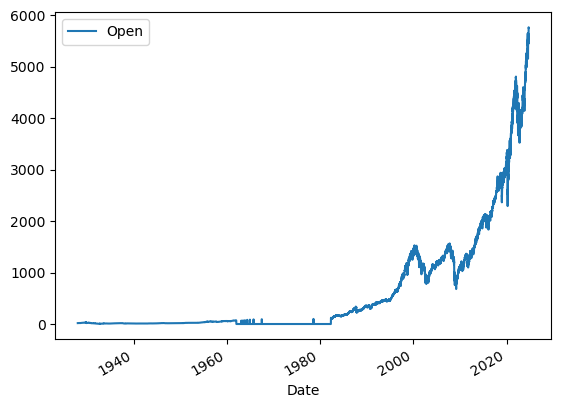

In [120]:
sp500.plot(y="Open", use_index=True)

**Closing Value :** Graph of daily closing price of the stock . 

<Axes: xlabel='Date'>

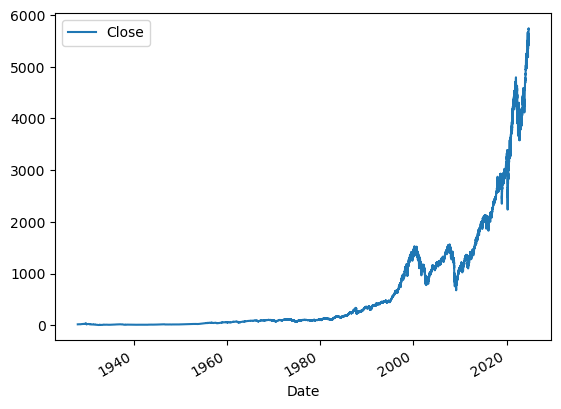

In [122]:
sp500.plot.line(y="Close", use_index=True)

In [124]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [126]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [128]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-09-23 00:00:00-04:00,5711.899902,5725.359863,5704.220215,5718.569824,3529550000,5732.930176
2024-09-24 00:00:00-04:00,5727.660156,5735.319824,5698.990234,5732.930176,3872710000,5722.259766
2024-09-25 00:00:00-04:00,5733.649902,5741.029785,5712.060059,5722.259766,3624910000,5745.370117


In [130]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [224]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-20 00:00:00-04:00,5709.640137,5715.140137,5674.490234,5702.549805,7867260000,5718.569824,1,0.999029,1.0,1.007442,3.0,1.032741,36.0,1.133071,147.0,1.307070,528.0
2024-09-23 00:00:00-04:00,5711.899902,5725.359863,5704.220215,5718.569824,3529550000,5732.930176,1,1.001403,1.0,1.007230,3.0,1.034906,36.0,1.135008,147.0,1.310035,528.0
2024-09-24 00:00:00-04:00,5727.660156,5735.319824,5698.990234,5732.930176,3872710000,5722.259766,0,1.001254,2.0,1.006273,3.0,1.036653,37.0,1.136541,148.0,1.312617,528.0


In [226]:
sp500 = sp500.loc["1990-01-01":].copy()

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

In [228]:
from sklearn.ensemble import RandomForestClassifier


In [230]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100] 
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"] 
model.fit(train[predictors], train["Target"])



RandomForestClassifier(min_samples_split=100, random_state=1)

In [272]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])


In [274]:
import pandas as pd
preds = pd.Series(preds, index=test.index)

In [276]:
preds

Date
2024-05-06 00:00:00-04:00    0
2024-05-07 00:00:00-04:00    0
2024-05-08 00:00:00-04:00    0
2024-05-09 00:00:00-04:00    0
2024-05-10 00:00:00-04:00    0
                            ..
2024-09-20 00:00:00-04:00    0
2024-09-23 00:00:00-04:00    0
2024-09-24 00:00:00-04:00    0
2024-09-25 00:00:00-04:00    0
2024-09-26 00:00:00-04:00    0
Length: 100, dtype: int32

In [309]:
precision_score(test["Target"], preds)

C:\Users\anura\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.0

In [311]:
combined = pd.concat([test["Target"],preds], axis=1)

<Axes: xlabel='Date'>

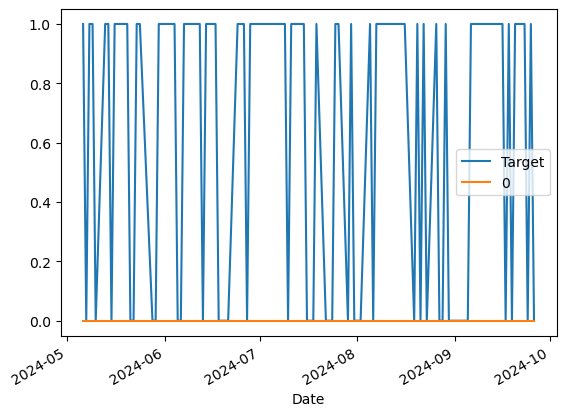

In [313]:
combined.plot()

In [315]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [317]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for  i in range(start, data.shape[0], step):
        train = data.iloc[0:1].copy()
        test = data.iloc[i:(i+step)].copy()
        predictors = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [319]:
predictions = backtest(sp500, model, predictors)

In [1]:
predictions["Predictions"].value_counts()

NameError: name 'predictions' is not defined

In [293]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5288906009244992

In [295]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.535754
0    0.464246
Name: count, dtype: float64

In [297]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_column, trend_column]

In [299]:
sp500 = sp500.dropna()

In [301]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1997-11-26 00:00:00-05:00,950.820007,956.469971,950.820007,951.640015,487750000,955.400024,1,1.000431,2.0,0.997275,4.0,1.009111,33.0,1.113282,138.0,1.517046,563.0
1997-11-28 00:00:00-05:00,951.640015,959.130005,951.640015,955.400024,189070000,974.770020,1,1.001972,2.0,1.001967,4.0,1.012659,33.0,1.116599,139.0,1.521842,564.0
1997-12-01 00:00:00-05:00,955.400024,974.770020,955.400024,974.770020,590300000,971.679993,0,1.010035,2.0,1.019783,4.0,1.032356,34.0,1.138015,140.0,1.551433,564.0
1997-12-02 00:00:00-05:00,974.780029,976.200012,969.830017,971.679993,576120000,976.770020,1,0.998412,1.0,1.011259,4.0,1.028349,33.0,1.133204,140.0,1.545272,563.0
1997-12-03 00:00:00-05:00,971.679993,980.809998,966.159973,976.770020,624610000,973.099976,0,1.002612,1.0,1.011095,4.0,1.032949,33.0,1.137882,141.0,1.552105,564.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-20 00:00:00-04:00,5709.640137,5715.140137,5674.490234,5702.549805,7867260000,5718.569824,1,0.999029,1.0,1.007442,3.0,1.032741,36.0,1.133071,147.0,1.307070,528.0
2024-09-23 00:00:00-04:00,5711.899902,5725.359863,5704.220215,5718.569824,3529550000,5732.930176,1,1.001403,1.0,1.007230,3.0,1.034906,36.0,1.135008,147.0,1.310035,528.0
2024-09-24 00:00:00-04:00,5727.660156,5735.319824,5698.990234,5732.930176,3872710000,5722.259766,0,1.001254,2.0,1.006273,3.0,1.036653,37.0,1.136541,148.0,1.312617,528.0


In [303]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [305]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined
    

IndexError: index 1 is out of bounds for axis 1 with size 1